In [83]:
from nilearn import datasets, plotting, image
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import load_img, resample_to_img
import pandas as pd

import cmcrameri.cm as ccm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap, to_rgba


## functions

In [17]:
import pandas as pd

def find_indices_with_term(df, term, columns_to_check):
    """
    Find indices in a DataFrame where the given term appears in any of the specified columns.

    Parameters:
    - df: pandas.DataFrame, the DataFrame to search.
    - term: str, the term to search for.
    - columns_to_check: list, the columns in which to search for the term.

    Returns:
    - list, a list of indices where the term is found.
    """
    # Apply a mask to find the term in the specified columns, case insensitive
    mask = df[columns_to_check].apply(lambda x: x.str.contains(term, case=False, na=False)).any(axis=1)
    
    # Get the indices where the term is found
    indices_with_term = df.index[mask].tolist()
    
    return indices_with_term



# Note: Replace 'labels_df' with the actual DataFrame variable you are using.


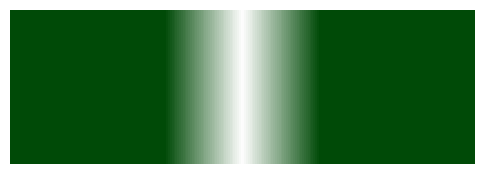

In [87]:
import matplotlib.colors as mcolors

# Define the adjusted colors with higher saturation and contrast
adjusted_colors_with_opacity = [
    (-2, to_rgba("#004A07", alpha=1)),  # Dark blue, fully opaque
    (-1, to_rgba("#004A07", alpha=1)),  # Brighter blue, fully opaque
    (-.5, to_rgba("#004A07", alpha = 1)),
    (0, to_rgba("#004A07", alpha=0)),           # Transparent for zero values
    (-0.5, to_rgba("#004A07", alpha=1)), 
    (1, to_rgba("#004A07", alpha=1)),   # Bright orange, fully opaque
    (2, to_rgba("#004A07", alpha=1))    # Dark red, fully opaque
]
#
# Normalize the points to the [0, 1] interval and prepare the colors for the colormap
adjusted_norm_points = np.linspace(-2, 2, len(adjusted_colors_with_opacity))
adjusted_norm_points = (adjusted_norm_points - adjusted_norm_points.min()) / (adjusted_norm_points.max() - adjusted_norm_points.min())
adjusted_norm_colors = [c[1] for c in adjusted_colors_with_opacity]

# Create an adjusted custom colormap
adjusted_cmap = LinearSegmentedColormap.from_list("adjusted_custom_gradient", list(zip(adjusted_norm_points, adjusted_norm_colors)))

# Create a gradient to visualize the adjusted colormap
adjusted_gradient = np.linspace(0, 1, 256)
adjusted_gradient = np.vstack((adjusted_gradient, adjusted_gradient))

# Plot the gradient for the adjusted colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(adjusted_gradient, aspect='auto', cmap=adjusted_cmap)
ax.set_axis_off()

plt.show()


## load atlas

In [67]:


# Load the custom atlas NIfTI file
atlas_filename = '/Users/h/Documents/projects_local/cue_expectancy/resources/atlas/painpathway.nii'
atlas_img = load_img(atlas_filename)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

# Resample your atlas to the same space as the target MNI template
# resampled_atlas_img = resample_to_img(source_img=atlas_img, target_img=target_img, interpolation='nearest')

# Load the CSV file containing labels
labels_csv = '/Users/h/Documents/projects_local/cue_expectancy/resources/atlas/painpathway_labels.txt'
labels_df = pd.read_csv(labels_csv, header=None)
labels_df.columns = ['roi']


In [68]:
labels_df

roi
0     Thal_VPLM_R
1     Thal_VPLM_L
2         Thal_IL
3         Thal_MD
4          Hythal
5           pbn_R
6           pbn_L
7       Bstem_PAG
8           rvm_R
9           Amy_R
10          Amy_L
11        dpIns_L
12        dpIns_R
13           S2_L
14           S2_R
15         mIns_L
16         mIns_R
17         aIns_L
18         aIns_R
19      aMCC_MPFC
20      s1_foot_L
21      s1_foot_R
22  s1_handplus_L
23  s1_handplus_R

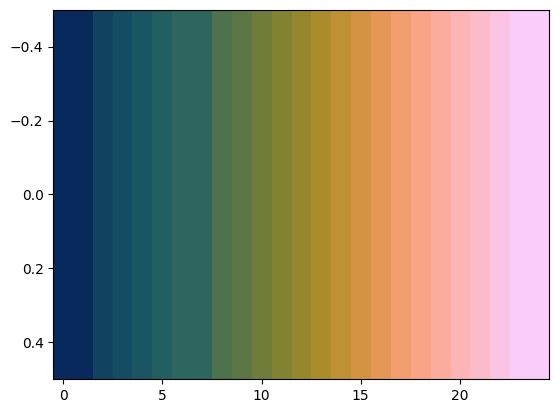

In [102]:
plt.imshow([np.linspace(0, 1, 25)], aspect='auto', cmap=batlow_cmap)


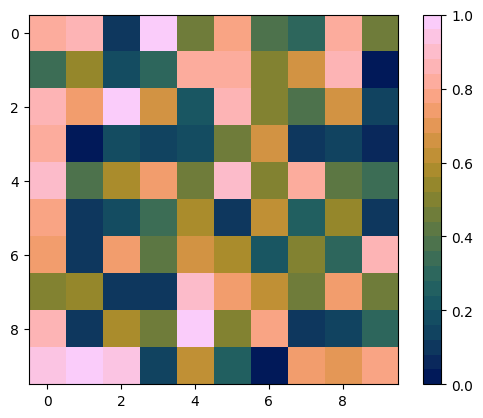

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
data = np.random.rand(10, 10)  # Random data between 0 and 1

# Normalizing data to ensure it spans the entire colormap range
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

plt.imshow(data_normalized, cmap=batlow_cmap)
plt.colorbar()
plt.show()


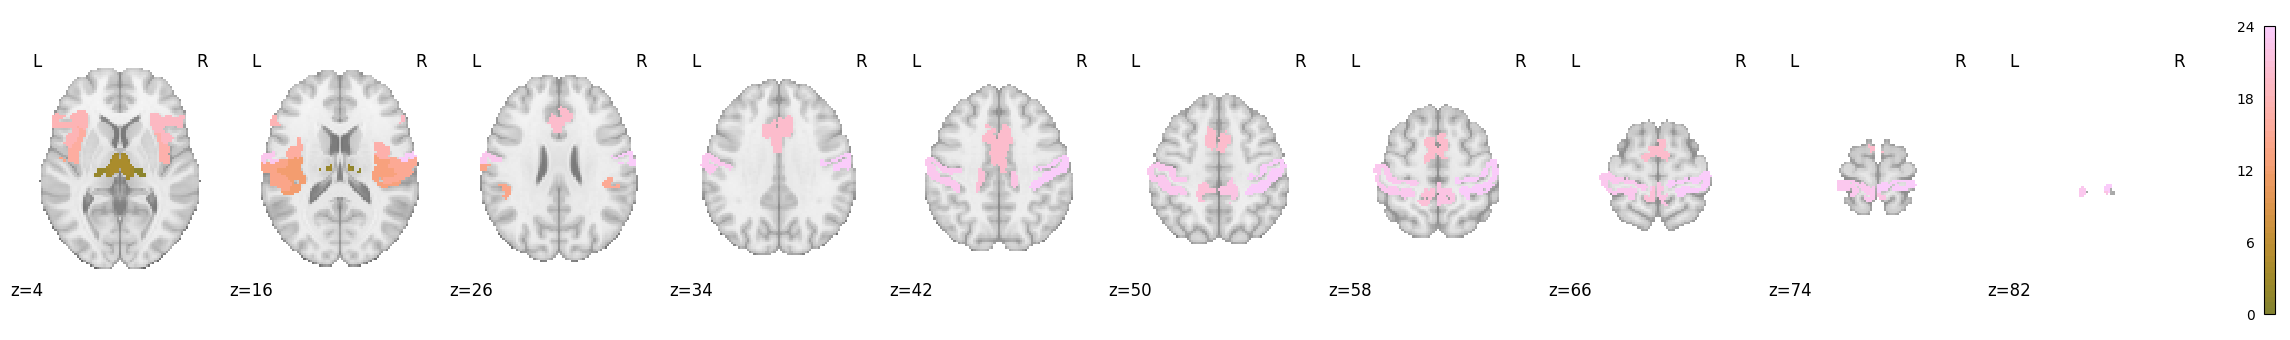

In [112]:
batlow_colors = ccm.batlow(np.linspace(0, 1, 100))  # Skip the first color
# batlow_cmap = LinearSegmentedColormap.from_list("Batlow25", batlow_rgb, N=256)

batlow_cmap = LinearSegmentedColormap.from_list("Batlow25", batlow_colors, N=100)
plotting.plot_stat_map(atlas_img, cmap=batlow_cmap , display_mode='z', cut_coords=10)

In [15]:
labels_df

0
0     Thal_VPLM_R
1     Thal_VPLM_L
2         Thal_IL
3         Thal_MD
4          Hythal
5           pbn_R
6           pbn_L
7       Bstem_PAG
8           rvm_R
9           Amy_R
10          Amy_L
11        dpIns_L
12        dpIns_R
13           S2_L
14           S2_R
15         mIns_L
16         mIns_R
17         aIns_L
18         aIns_R
19      aMCC_MPFC
20      s1_foot_L
21      s1_foot_R
22  s1_handplus_L
23  s1_handplus_R

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize, facecolor=facecolor)


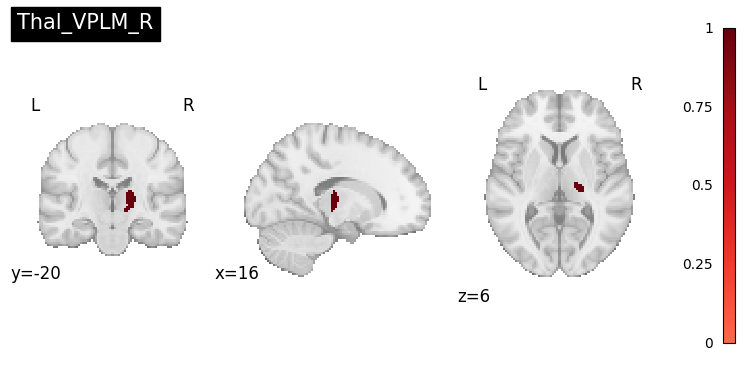

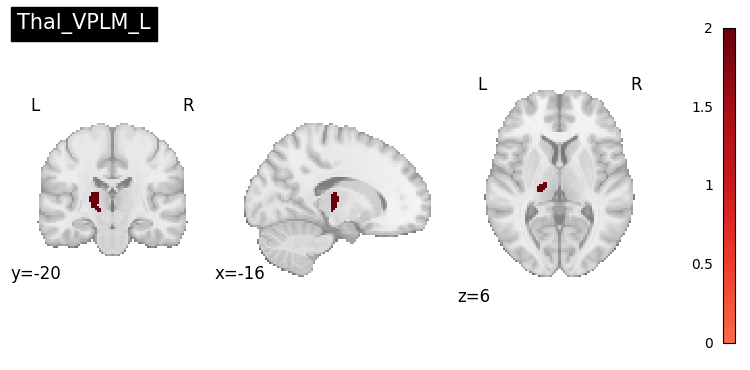

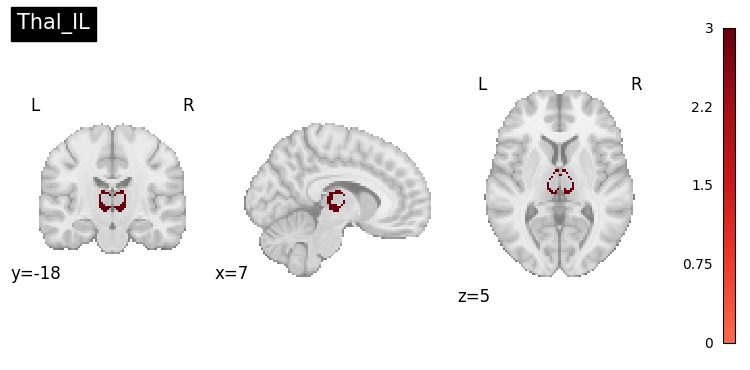

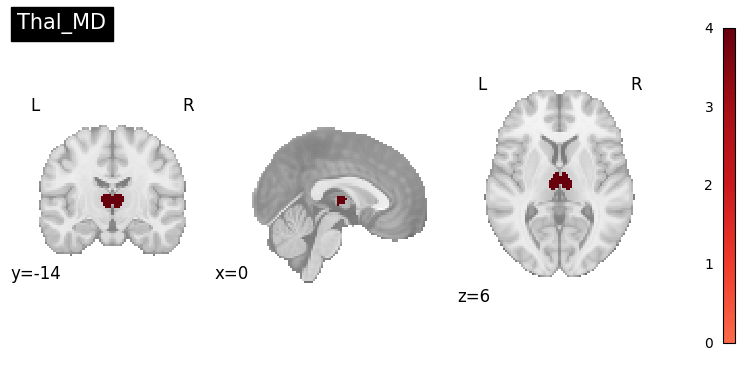

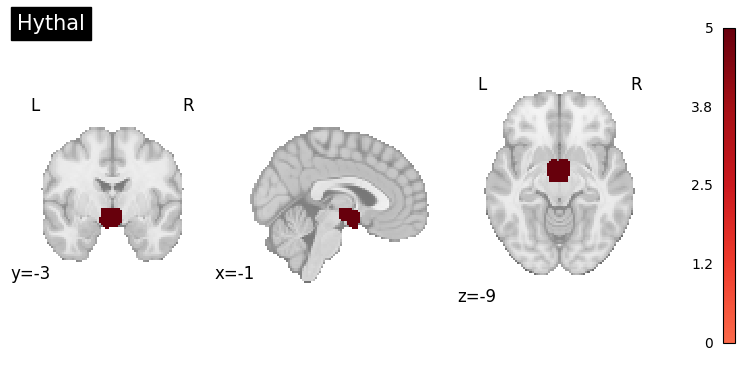

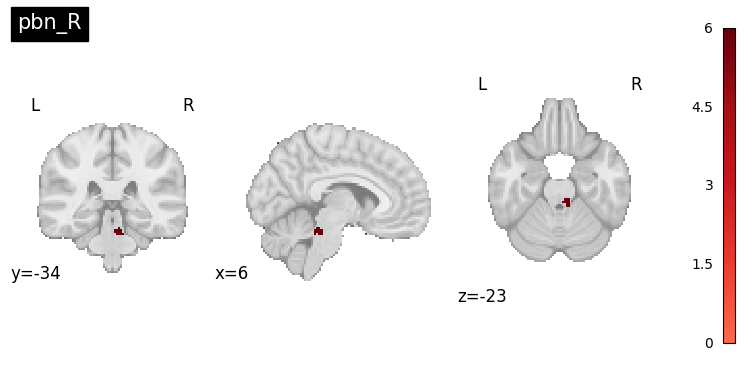

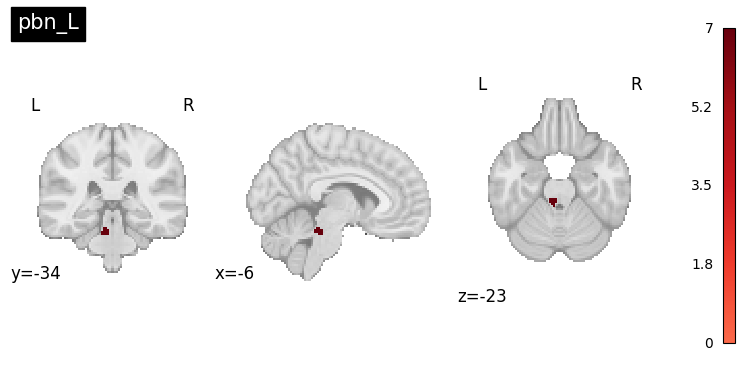

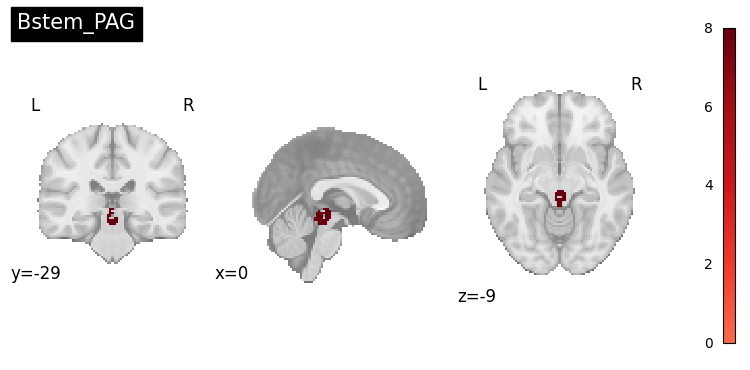

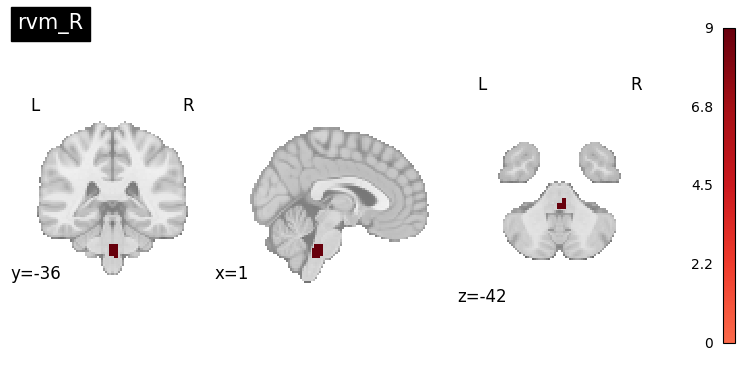

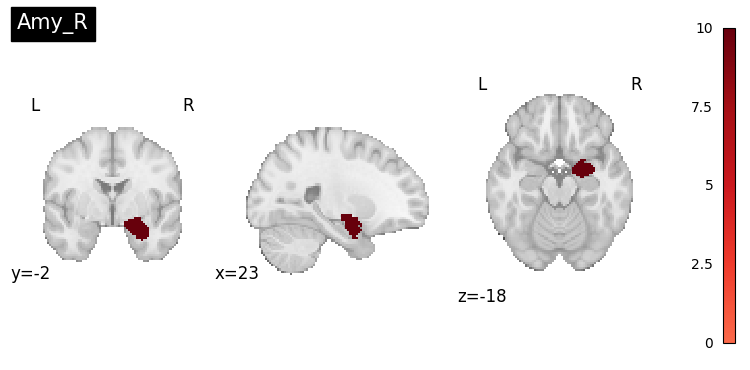

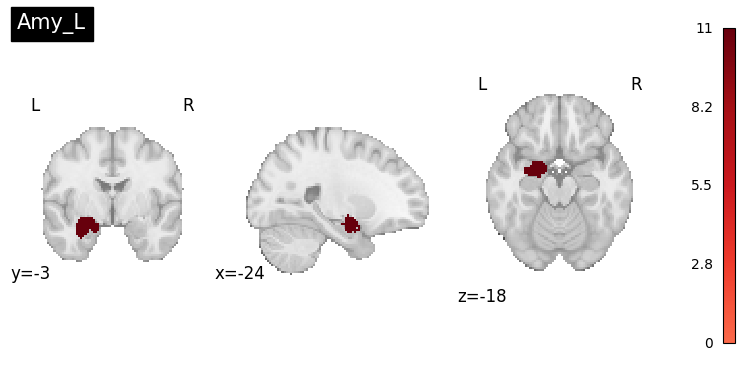

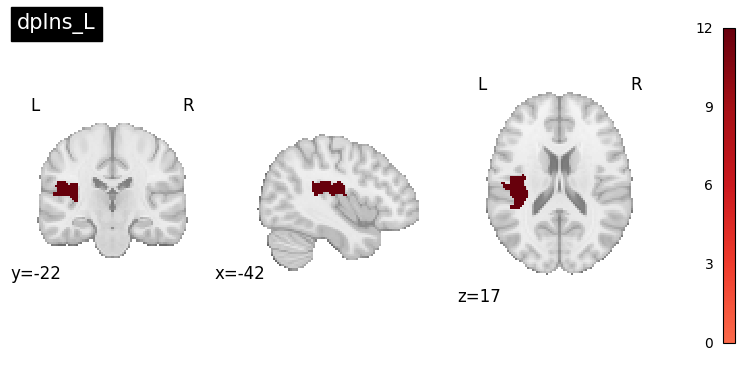

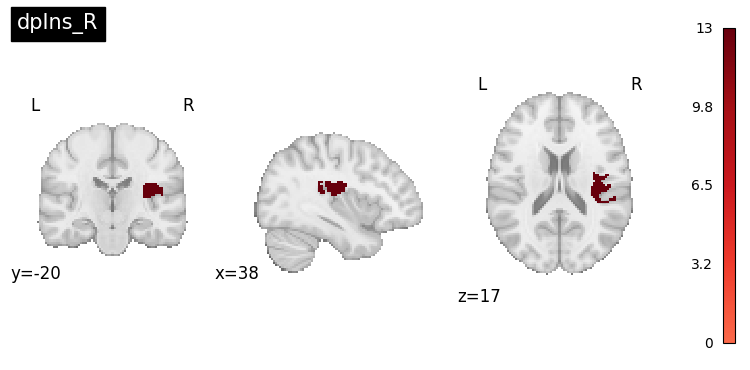

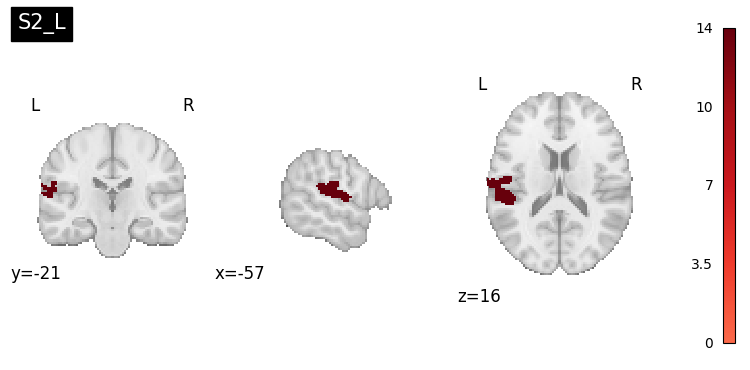

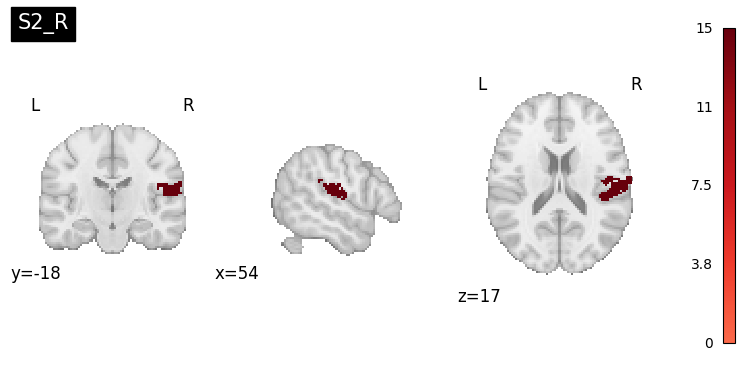

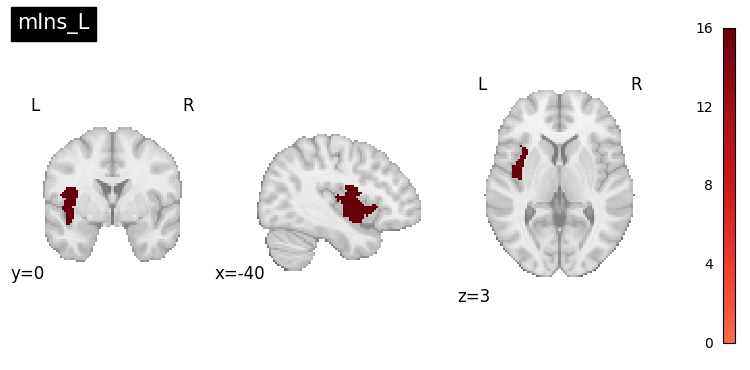

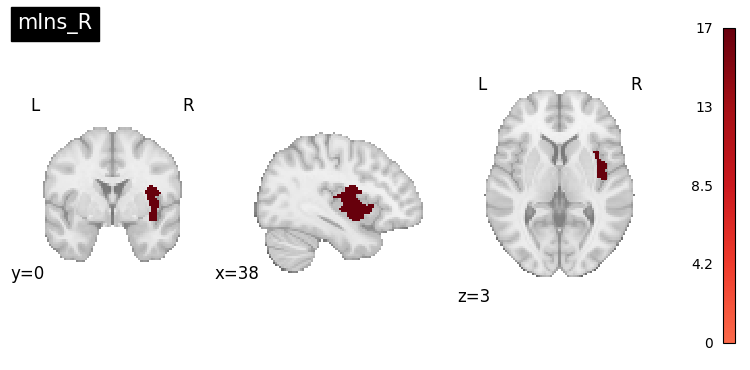

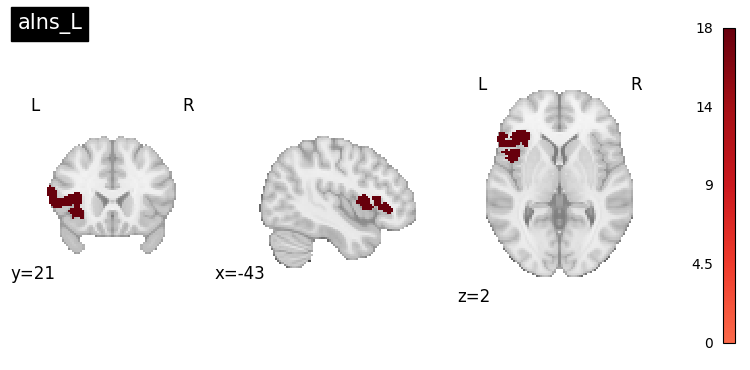

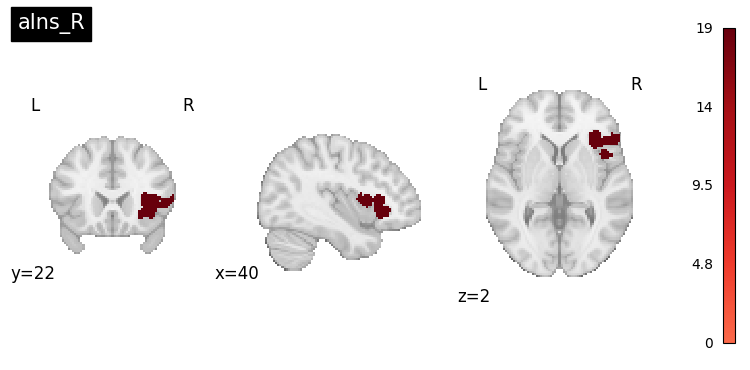

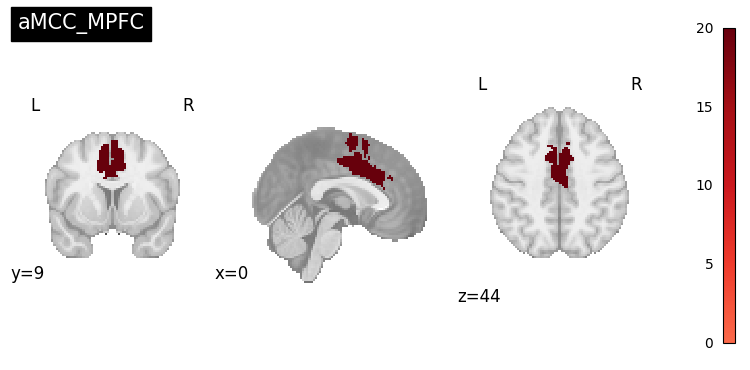

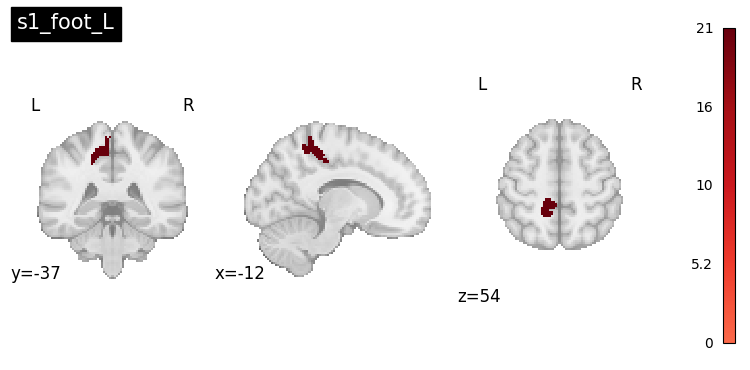

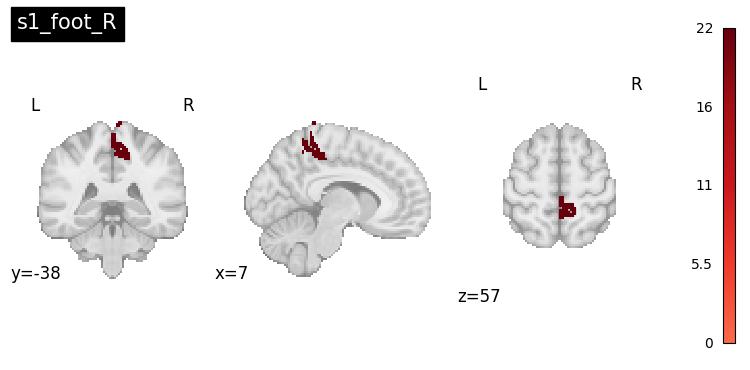

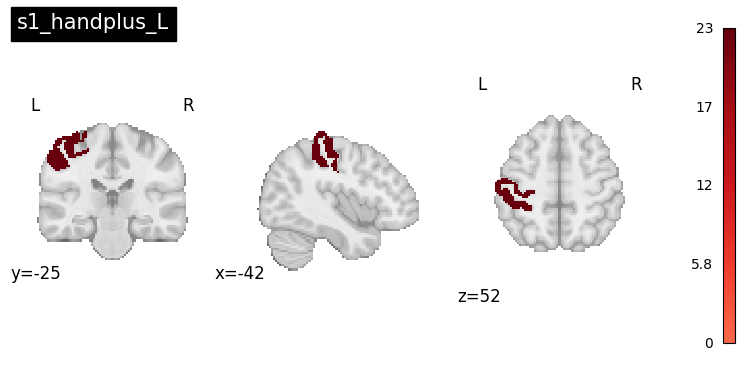

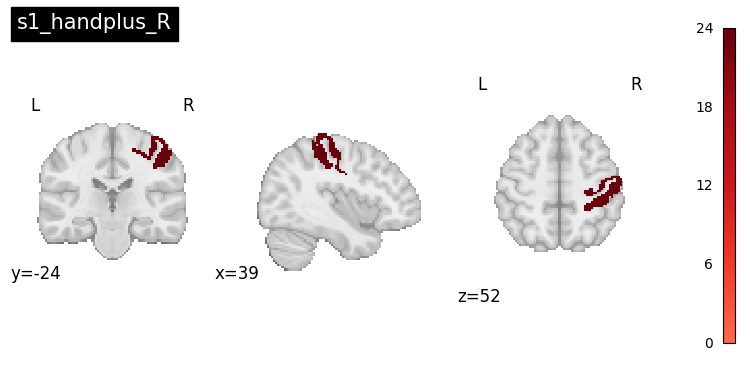

In [90]:
# roi = 'Thal_VPLM_R'

for roi_name in labels_df.roi:
    indices = find_indices_with_term(labels_df, str(roi_name), columns_to_check=['roi'])
    modified_img_data = np.zeros_like(atlas_img.get_fdata())
    idx = int(indices[0] + 1)
    matching_voxels = np.where(atlas_img.get_fdata() == idx)
    modified_img_data[matching_voxels] = atlas_img.get_fdata()[matching_voxels]
    from nilearn.image import new_img_like
    modified_nifti_img = new_img_like(atlas_img, modified_img_data)
    plotroi = plotting.plot_stat_map(modified_nifti_img, cmap='Reds', title=roi_name, draw_cross=False)
    plotroi.savefig(f"/Users/h/Documents/projects_local/cue_expectancy/resources/plots_dissertation/ch4/painpathwy_{roi_name}.png", dpi=300)

## insula

In [27]:
indices = find_indices_with_term(labels_df, 'Thal_VPLM_R', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices)
plotting.plot_prob_atlas(insula_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


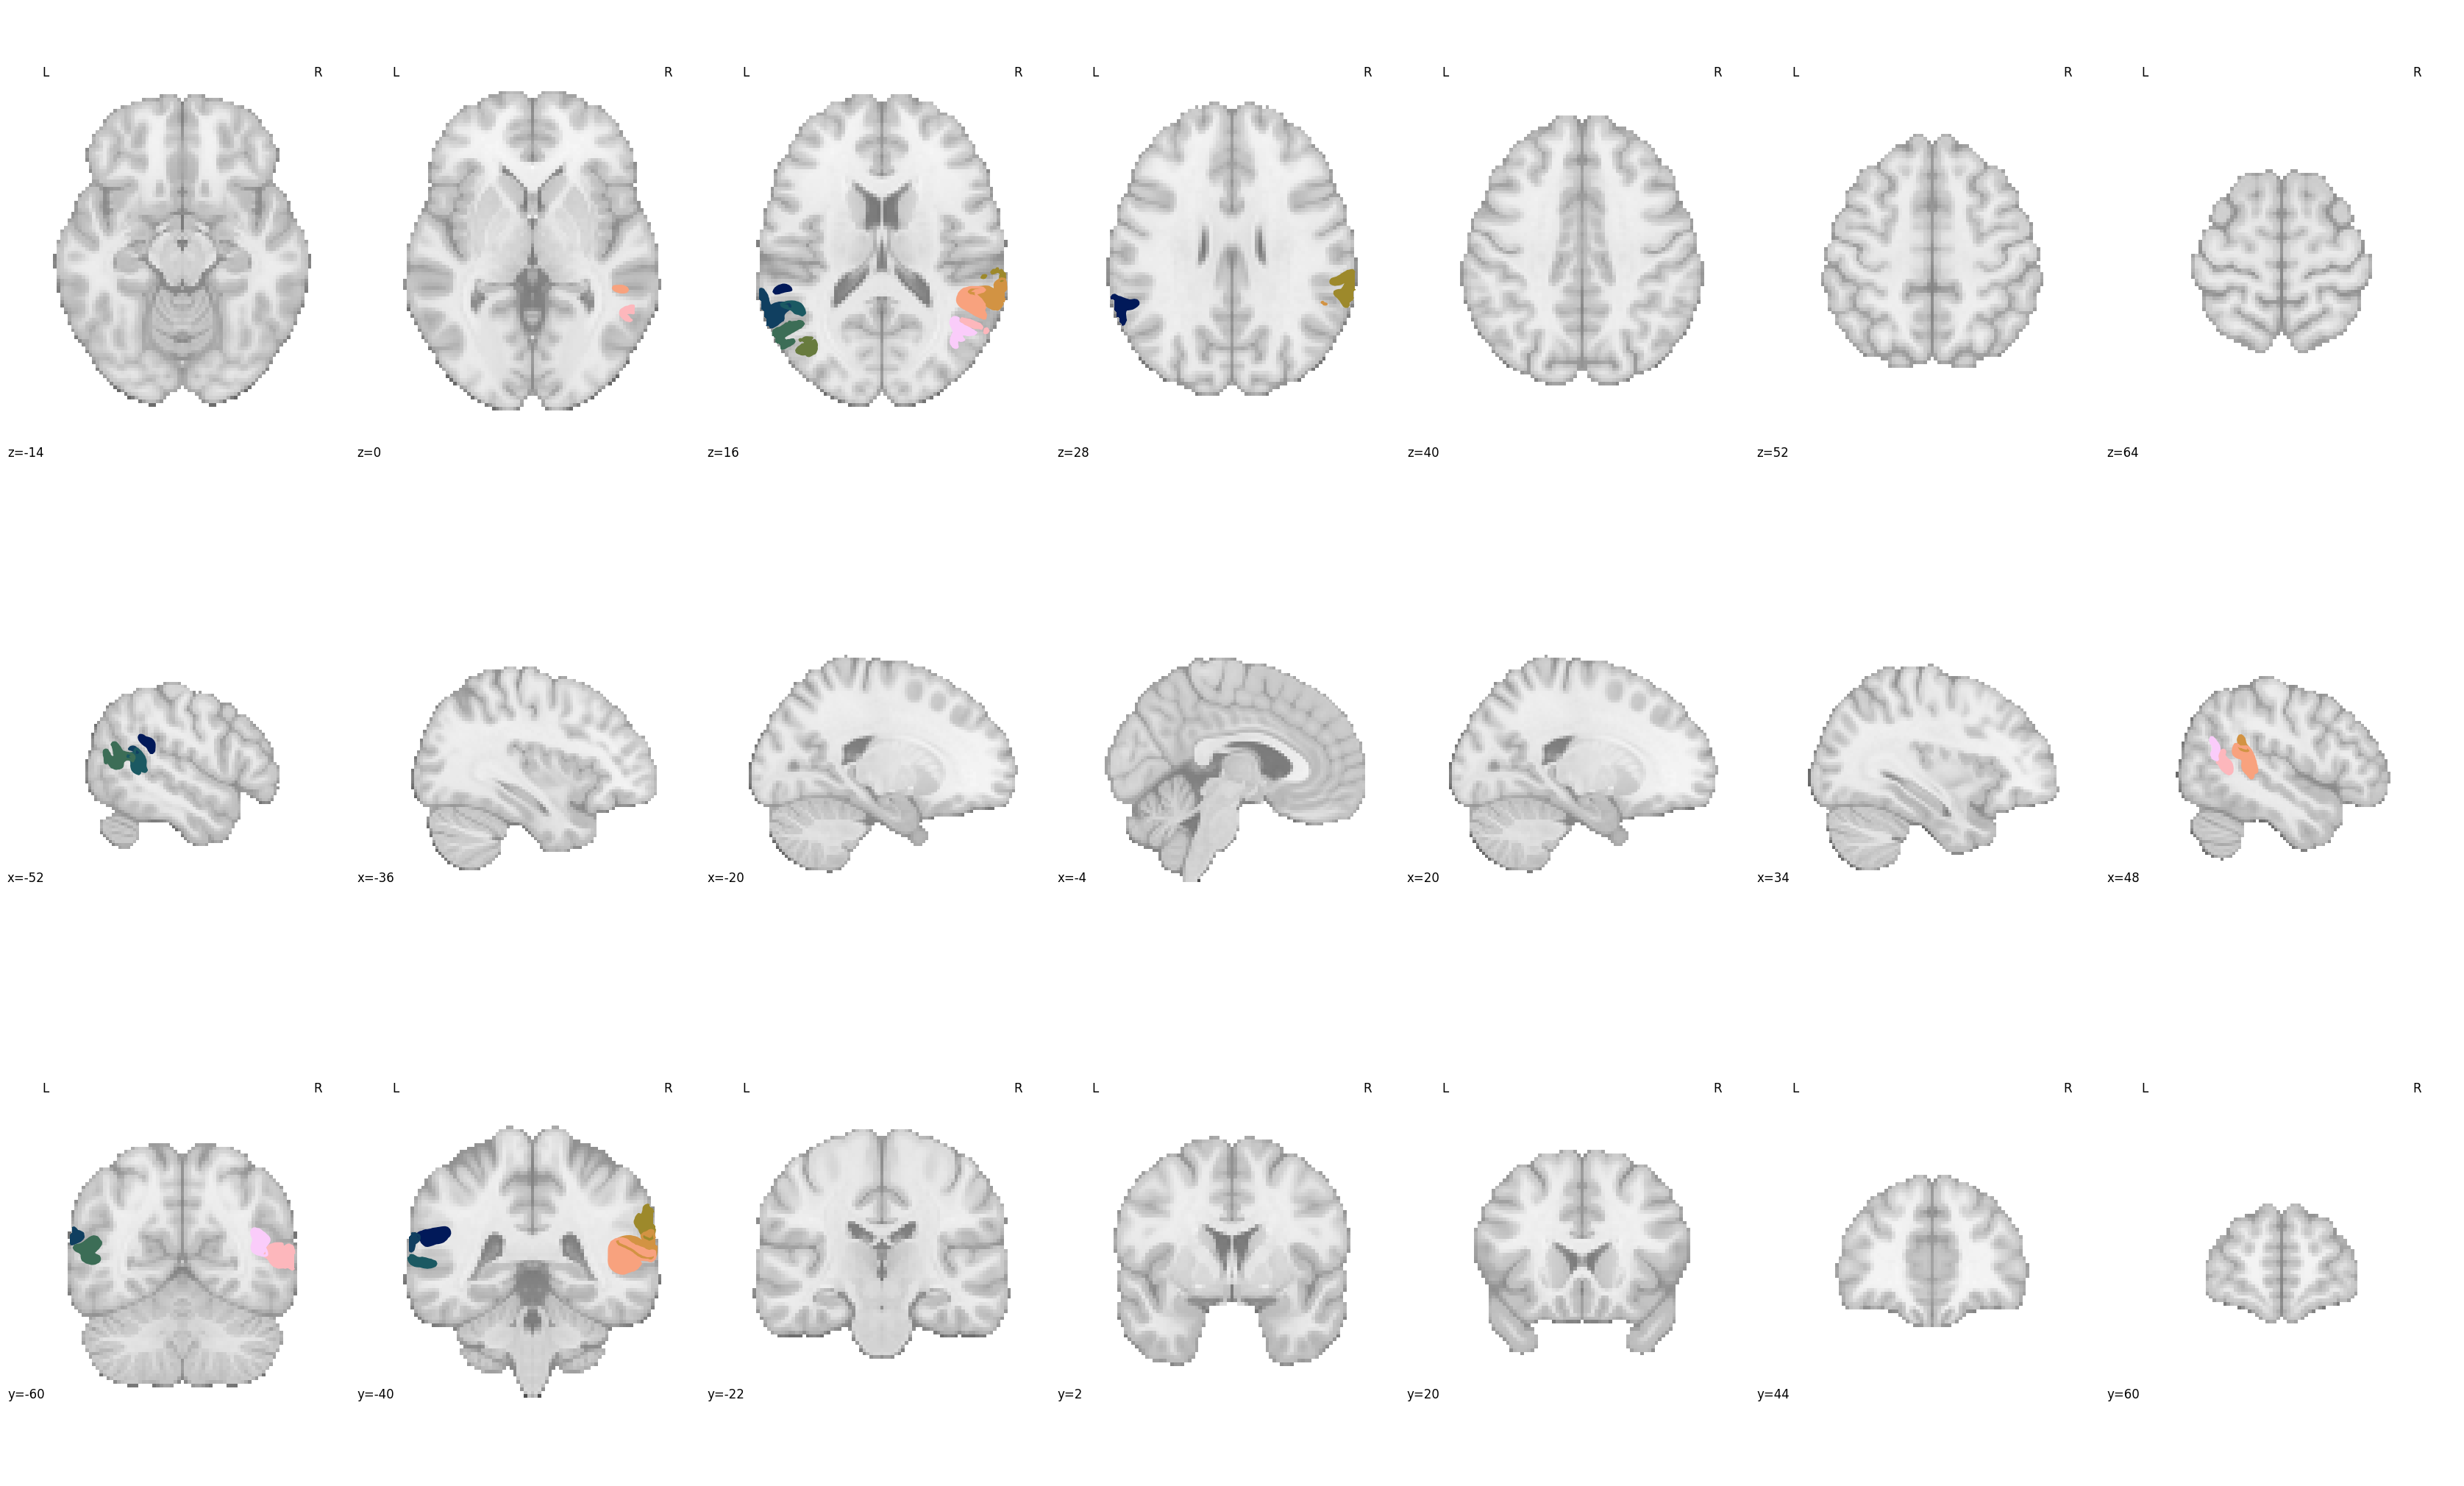

In [25]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


In [33]:
# labels_df['labels_4'].unique().tolist()

unique_values_ignoring_lr = labels_df['labels_4'].str.replace('_L', '').str.replace('_R', '').unique().tolist()

len(unique_values_ignoring_lr)

unique_values_ignoring_lr

['visual_early',
 'visual_MT+',
 'visual_dorsal',
 'visual_ventral',
 'somatomotor_primary',
 'somatomotor_premotor',
 'cingulate_posterior',
 'auditory_early',
 'parietal_TPOJ',
 'cingulate_dlPFC',
 'parietal_superior_lobule',
 'somatomotor_paracentral_lobule',
 'cingulate_ACC_mPFC',
 'cingulate_ventral_frontal',
 'cingulate_vlPFC',
 'somatomotor_operculum',
 'insula_posterior',
 'auditory_association_cortex',
 'insula_operculum',
 'insula_anterior',
 'parietal_inferior_lobule',
 'temporal_medial',
 'temporal_lateral',
 'Hippocampal_Formation',
 'Amygdala',
 'cerebellar_cortex',
 'vermis',
 'VStriatum',
 'CAU',
 'PUT',
 'GP',
 'Thalamus',
 'Midbrain',
 'Pons',
 'Medulla']

In [ ]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


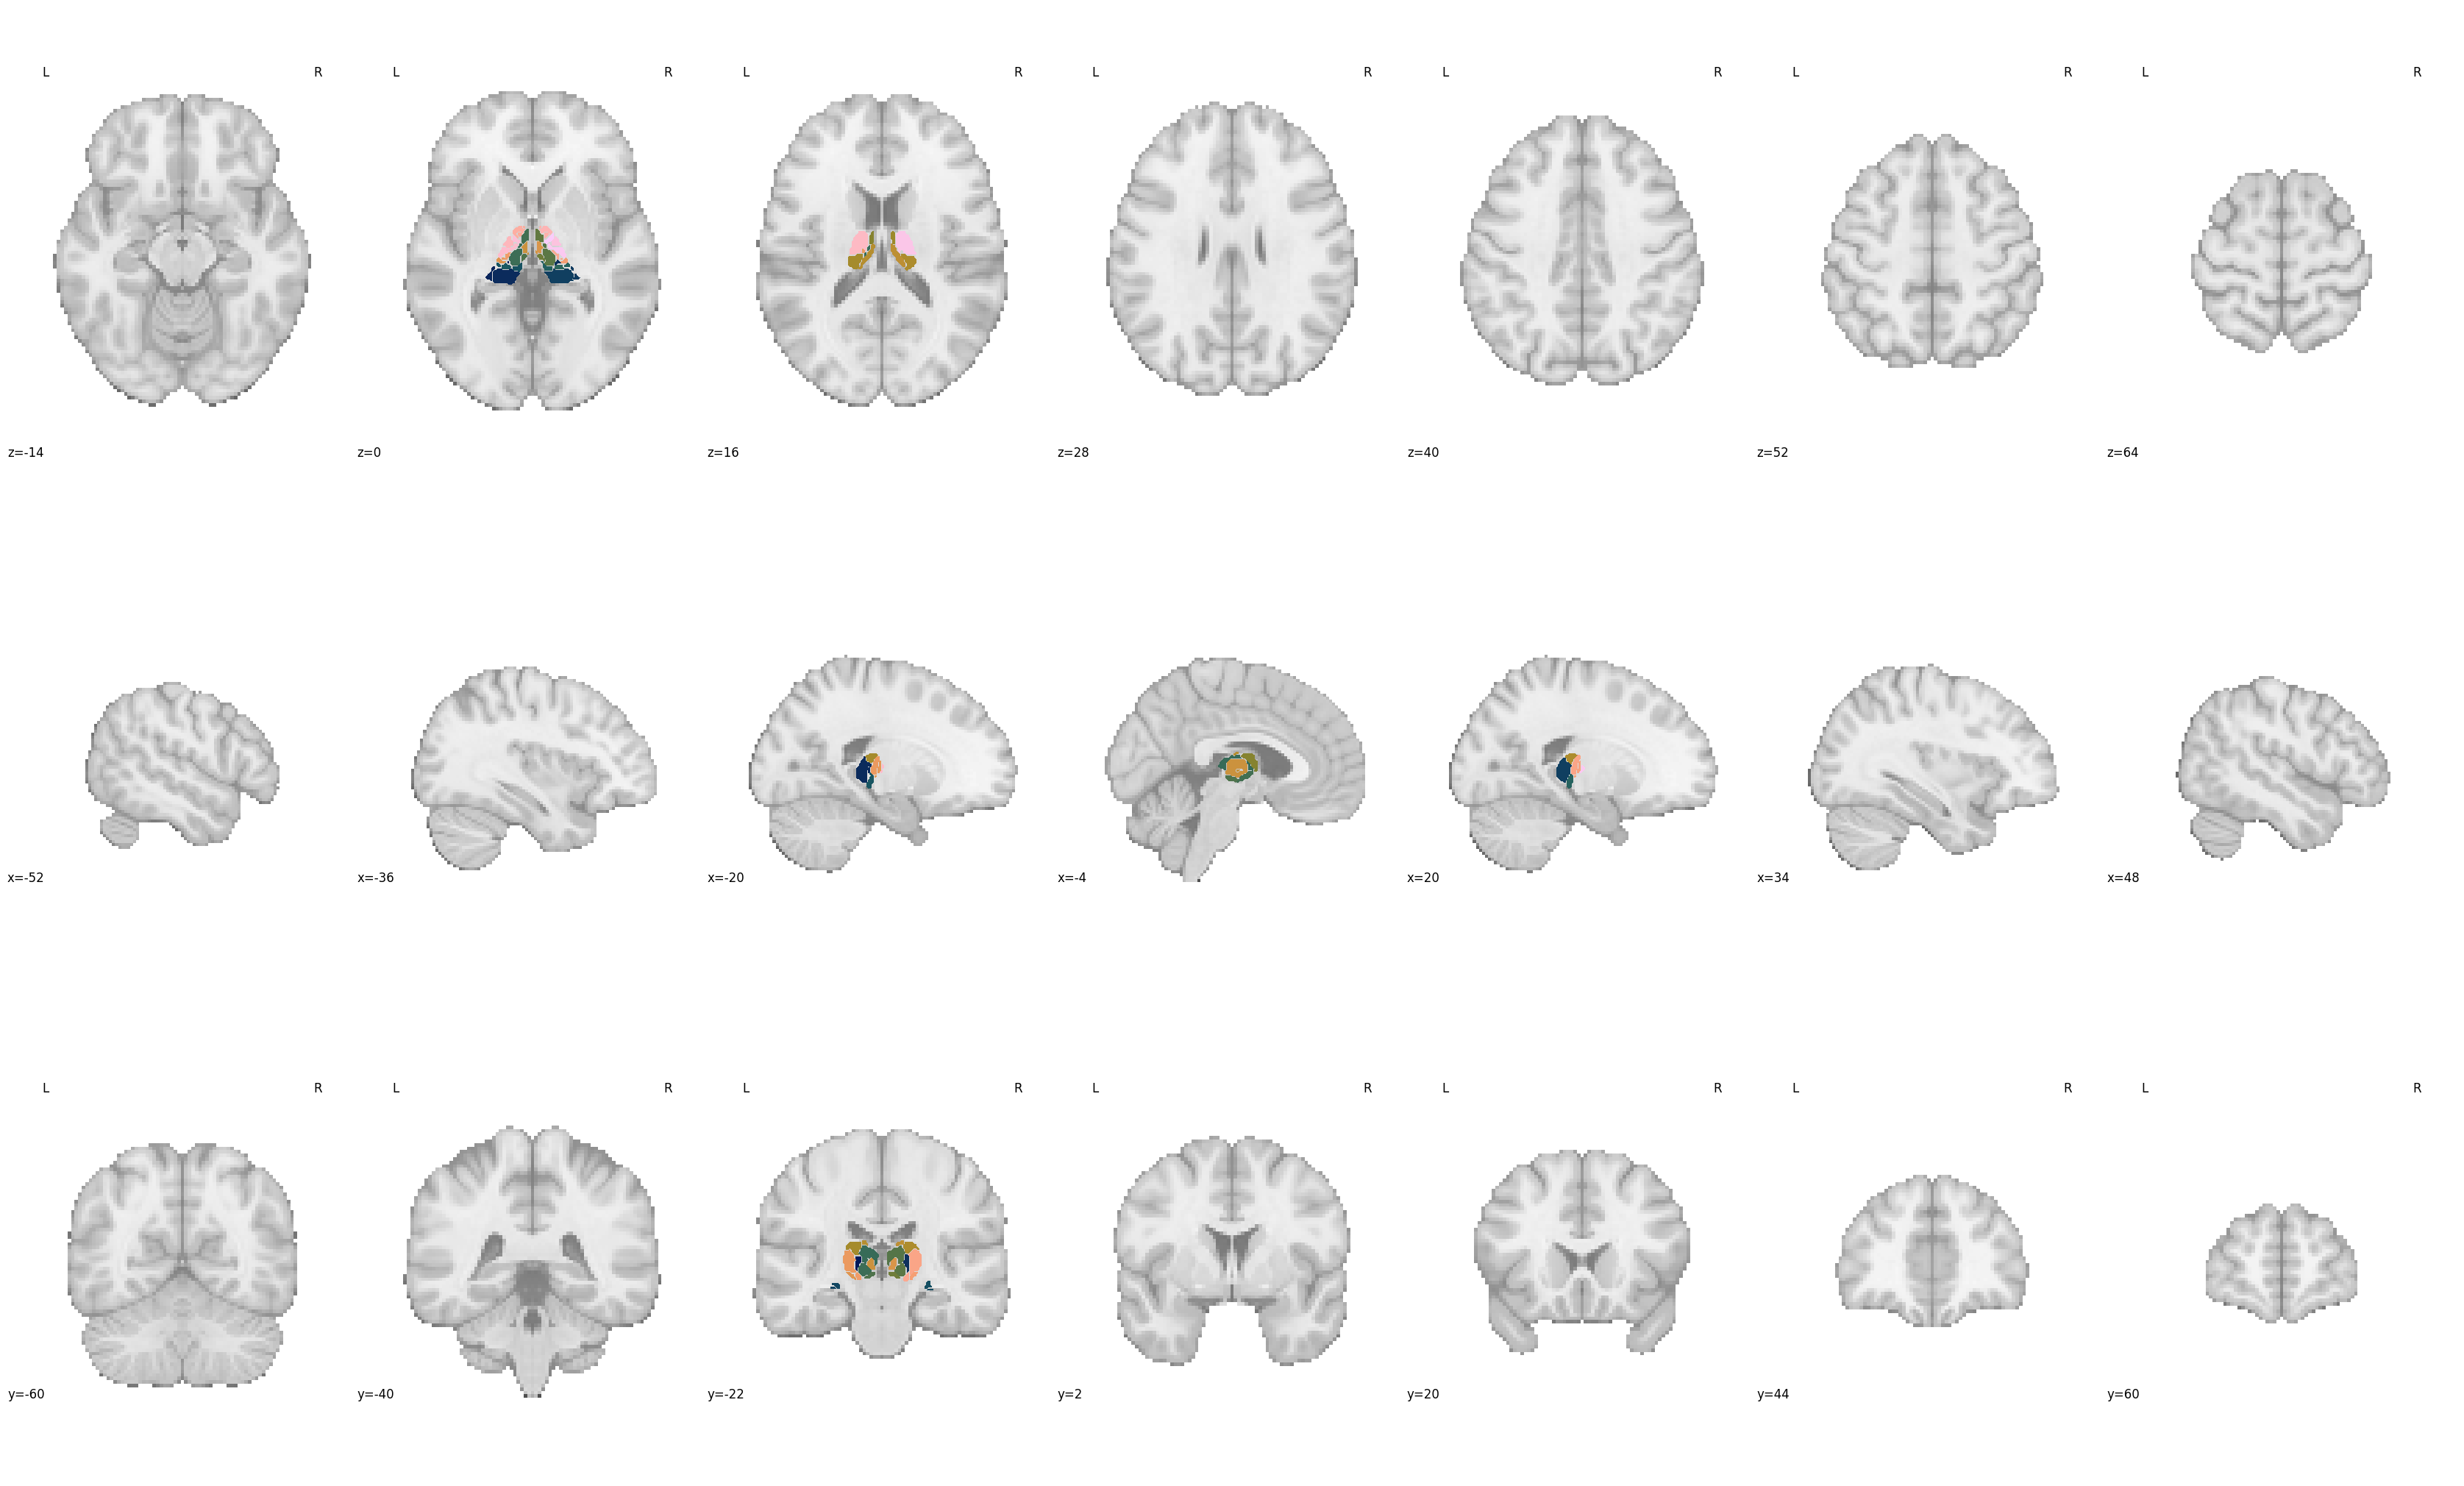

In [34]:
roi_key = 'Thalamus'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


Amygdala has 20 number of rois


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


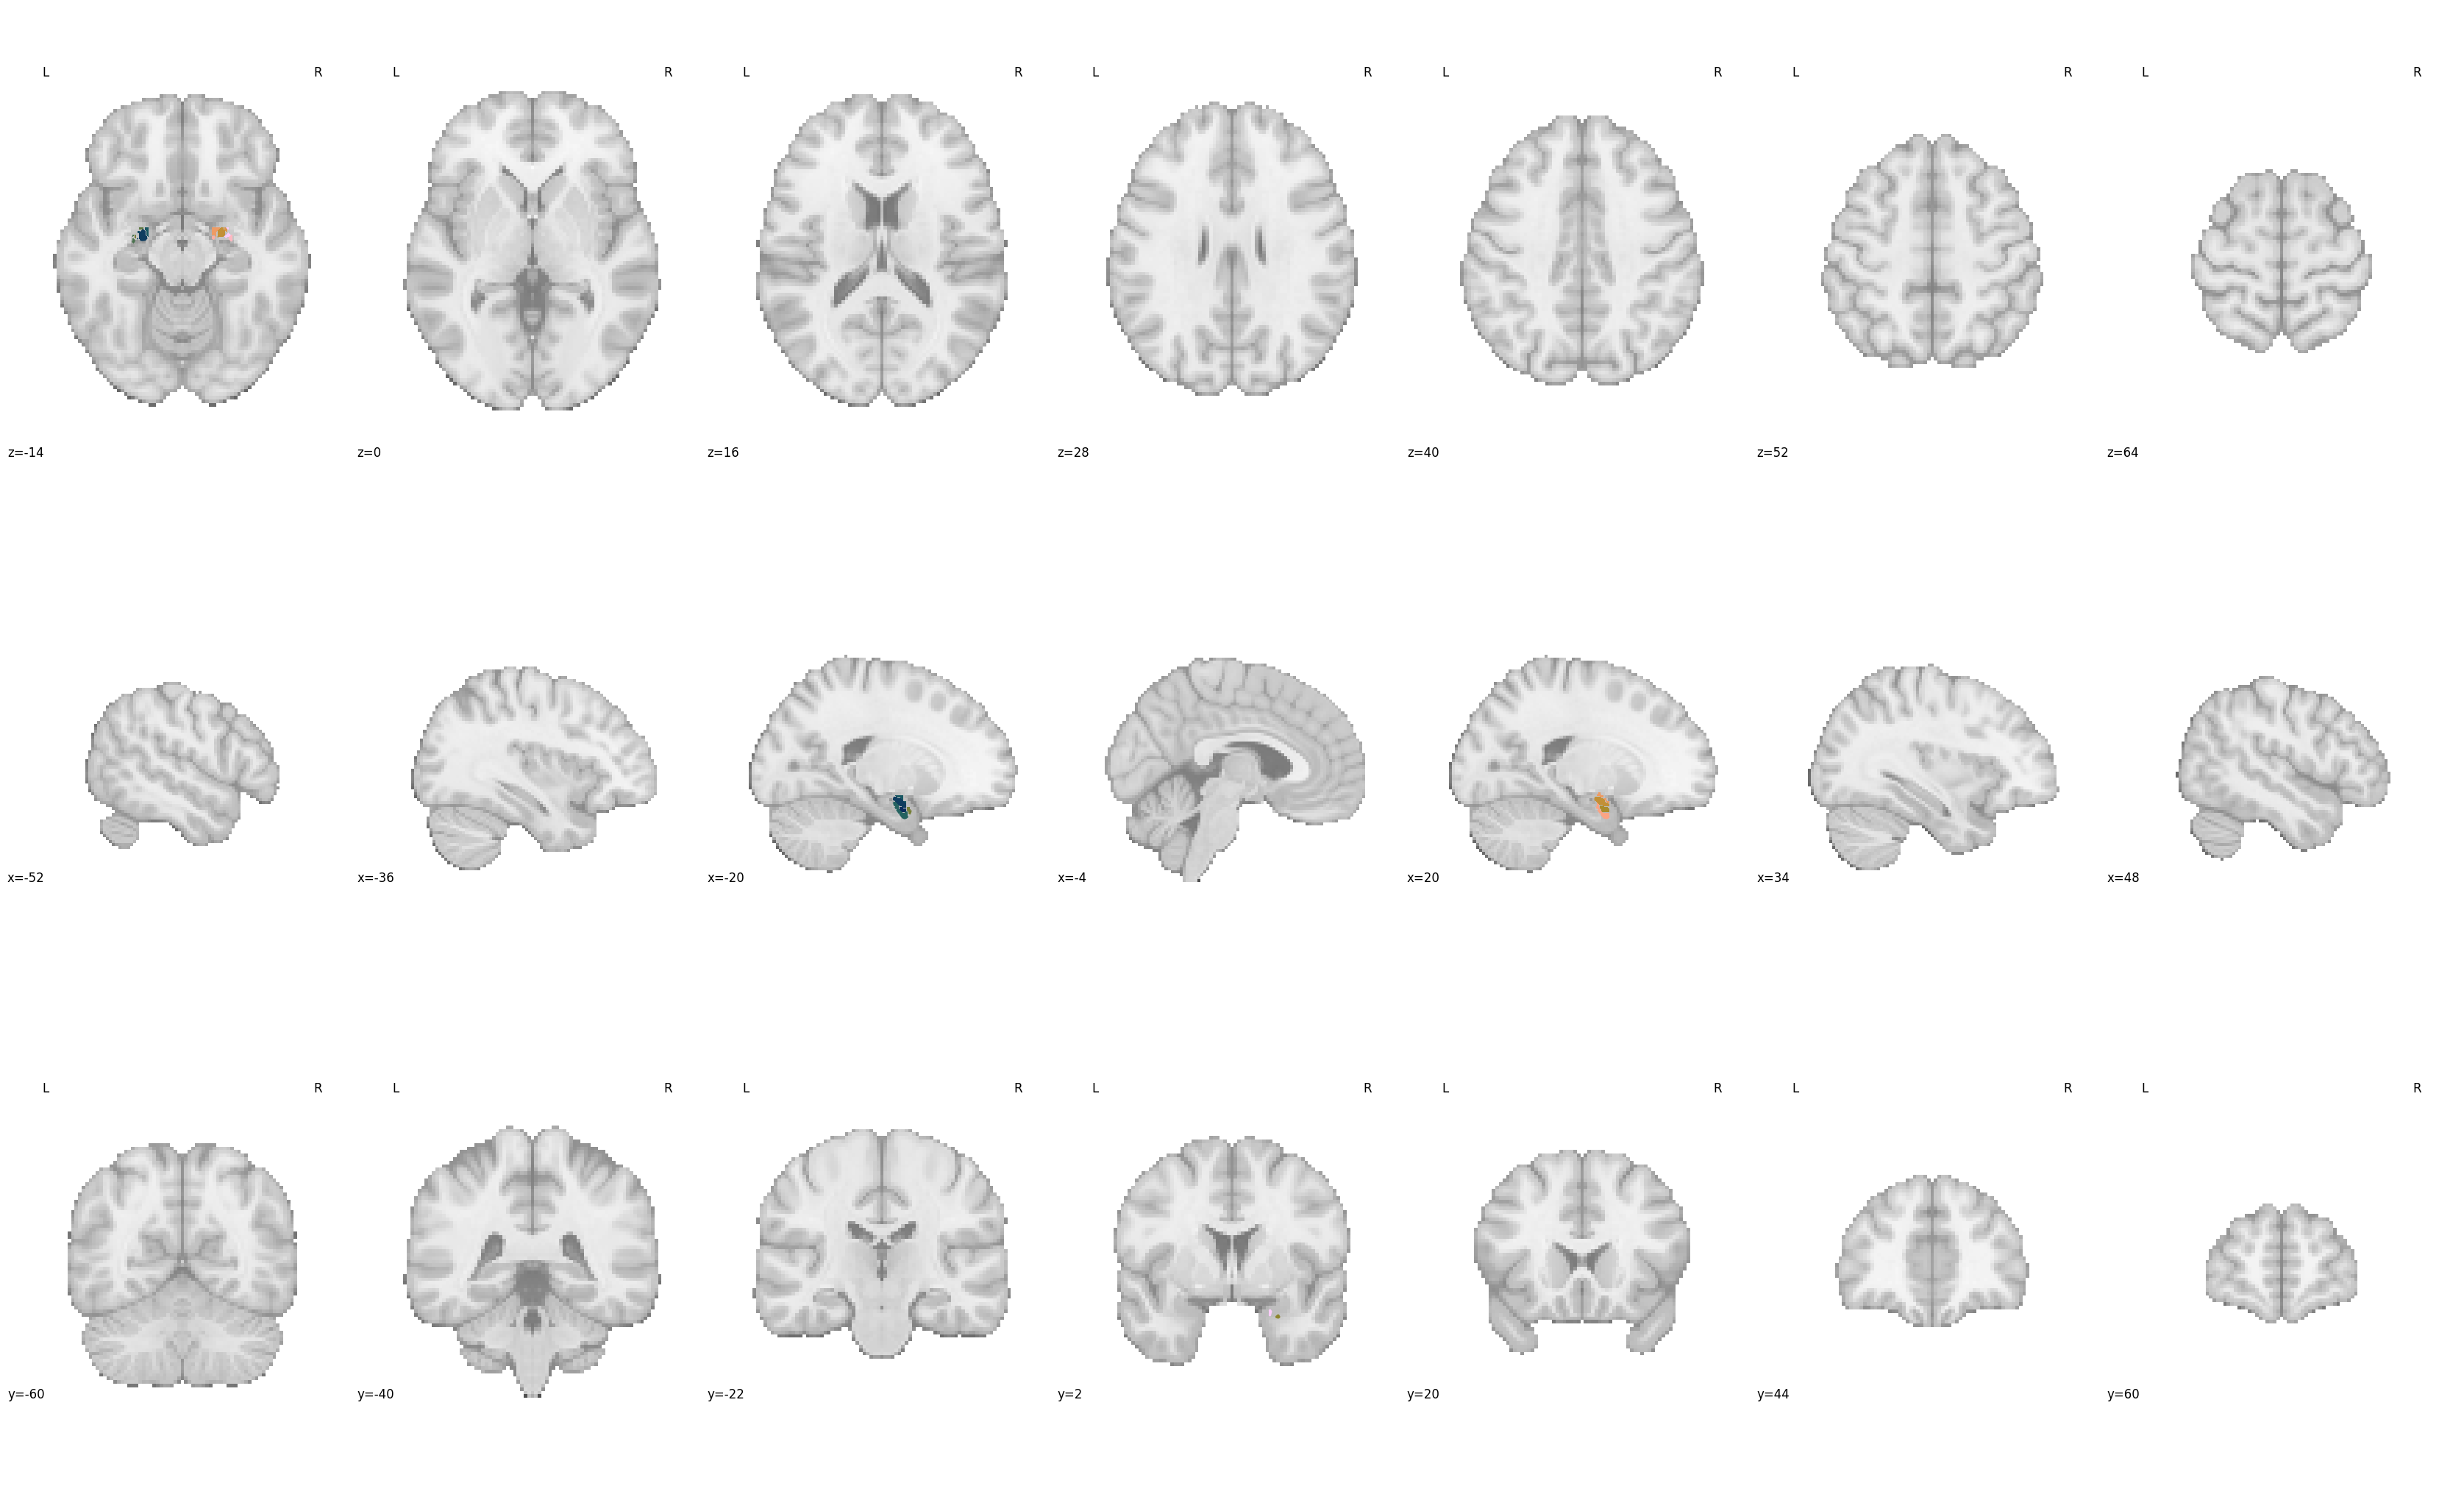

In [35]:
roi_key = 'Amygdala'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


# load matlab saved version

In [8]:
fname = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_coarse_2mm.nii'
atlas_img = load_img(fname)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

labels_csv = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_coarse_2mm.csv'
labels_df = pd.read_csv(labels_csv)

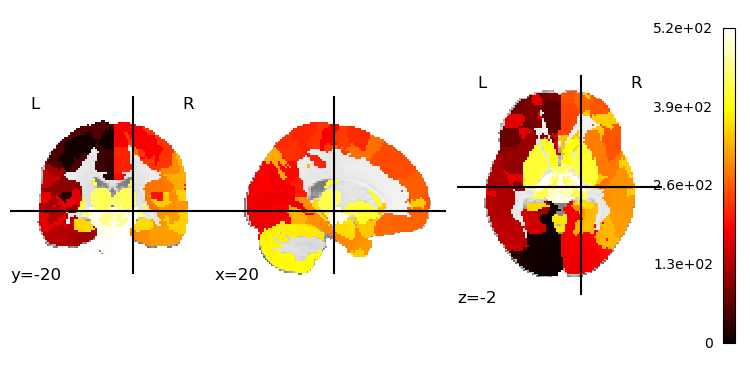

In [9]:
plotting.plot_stat_map(atlas_img)

In [19]:
from neuromaps import parcellate

parc = parcellate.Parcellater(parcellation=fname, 
                       space='MNI152', 
                       resampling_target='parcellation')
# extract data using the MNI atlas and neuromaps parcellator
singletrial_parc = parc.fit_transform('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', 'MNI152')
singletrial_parc.shape

(1, 524)

## apply atlas to timeseries

In [ ]:
from neuromaps import parcellate

hcplh = annot_to_gifti('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/lh.HCP-MMP1.annot')
hcprh = annot_to_gifti('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/rh.HCP-MMP1.annot')
HCP_fslr_lh = transforms.fsaverage_to_fslr(hcplh, hemi='L', target_density='32k', method='nearest')
HCP_fslr_rh = transforms.fsaverage_to_fslr(hcprh, hemi='R', target_density='32k', method='nearest')
HCP_fslr_rh_update = HCP_fslr_rh
HCP_fslr_rh_update[0].darrays[0].data = np.where(HCP_fslr_rh[0].agg_data() != 0, HCP_fslr_rh[0].agg_data() + 180, HCP_fslr_rh[0].agg_data())
hcp_glasser = (HCP_fslr_lh[0], HCP_fslr_rh_update[0])

fmri_fname = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0081/ses-04/func/sub-0081_ses-04_task-social_acq-mb8_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
singletrialFSLR = transforms.mni152_to_fslr(
    fmri_fname, fslr_density='32k', method='linear')
# hcpmni = transforms.fslr_to_mni152_to_fslr(hcp_glasser, )
HCPparc = Parcellater(hcp_glasser, 'fsLR', resampling_target='parcellation')
singletrial_parc = HCPparc.fit_transform(singletrialFSLR, 'fsLR')

# masker.fit_transform(fmri_fname, confounds=subset_confounds.fillna(subset_confounds.median()))
singletrial_parc = masker.fit_transform('/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0081/ses-04/func/sub-0081_ses-04_task-social_acq-mb8_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
singletrial_parc.shape

    # masker = NiftiLabelsMasker(labels_img=join(save_top_dir, 'schaefer_2018', 'Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'),
    #                            standardize=True,
    #                            high_pass=1/128,
    #                            t_r=0.46)

In [25]:
from neuromaps import parcellate


masker = NiftiLabelsMasker(labels_img=image.load_img(fname),
                           standardize=True,
                           high_pass=1/128,
                           t_r=0.46, 
                           resampling_target="labels")
# masker.fit_transform(fmri_fname, confounds=subset_confounds.fillna(subset_confounds.median()))
singletrial_parc = masker.fit_transform('/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0081/ses-04/func/sub-0081_ses-04_task-social_acq-mb8_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
singletrial_parc.shape

    # masker = NiftiLabelsMasker(labels_img=join(save_top_dir, 'schaefer_2018', 'Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'),
    #                            standardize=True,
    #                            high_pass=1/128,
    #                            t_r=0.46)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/joblib/memory.py:352: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


(872, 524)

check parcellated image: (1, 595)


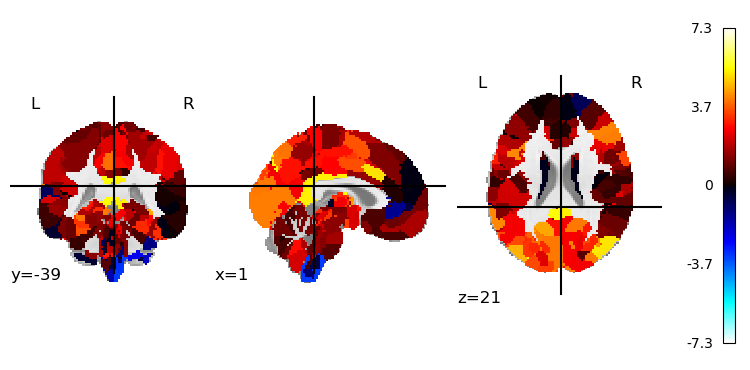

In [77]:
print(f"check parcellated image: {singletrial_parc.shape}")
beta_inv = parc.inverse_transform(singletrial_parc)
plotting.plot_stat_map(beta_inv)

# DEP: convert MNI map to fslr

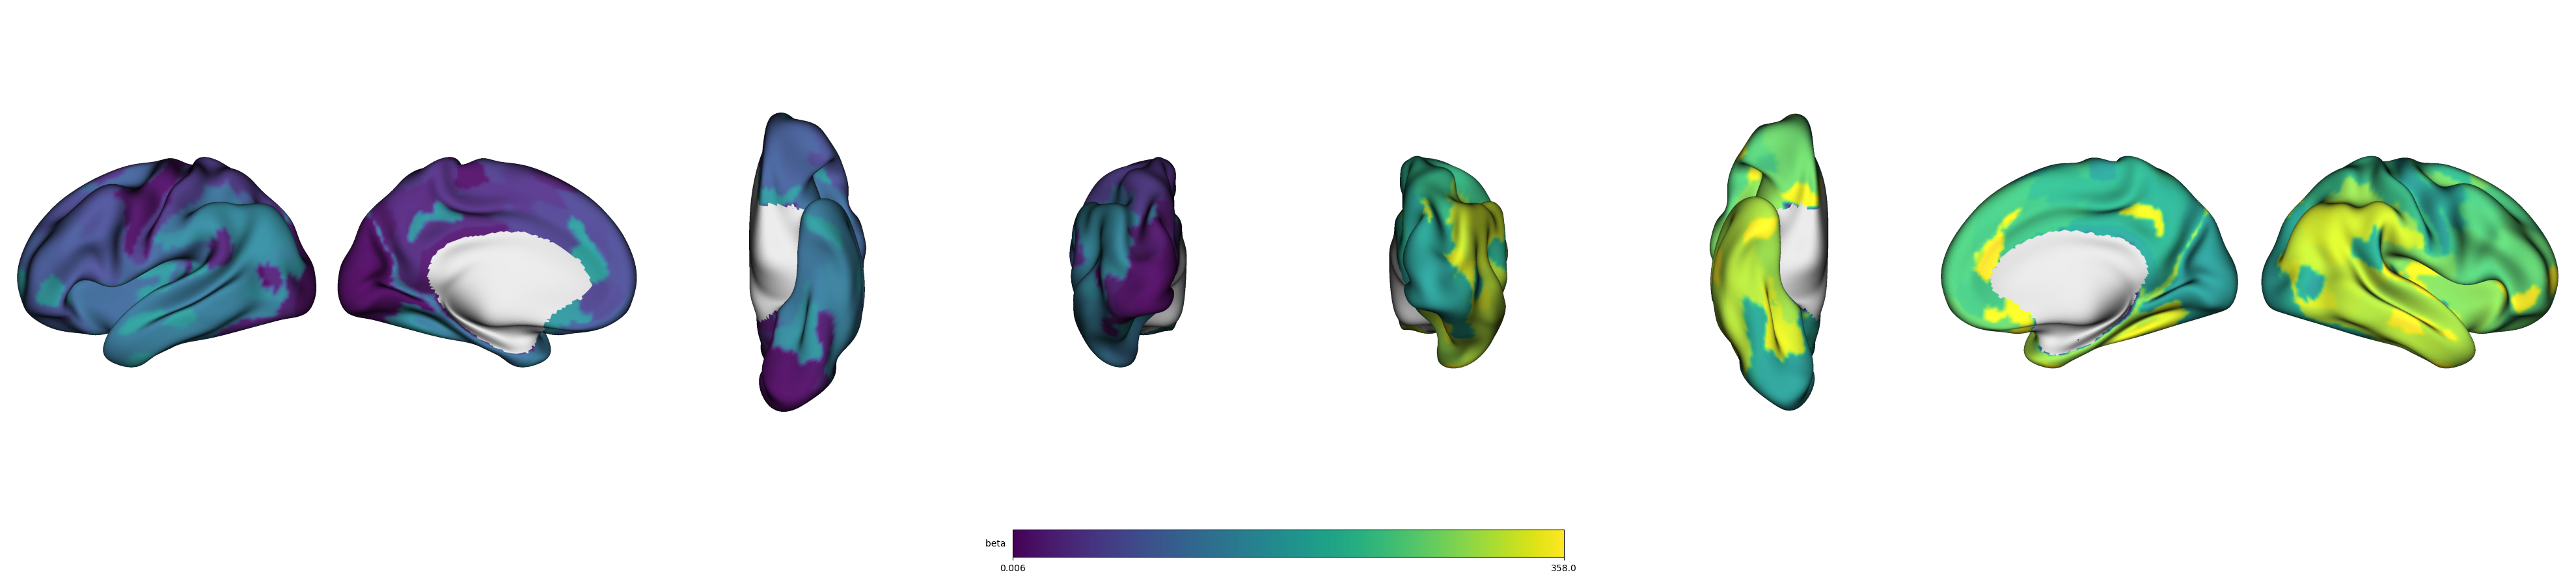

In [48]:
# convert to fslr
# import cmcrameri.cm as ccm
# beta_fslr = 
beta_inv = parc.inverse_transform(singletrial_parc)
beta_fslr = mni152_to_fslr(
        beta_inv, fslr_density='32k', method='linear')

# singletrial_parcfsLR = parcfsLR.fit_transform(beta_fslr, 'fsLR')
# print(f"check parcellated image: {singletrial_parcfsLR.shape}")
# betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)
fig = plot_brain_surfaces(image=beta_fslr, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

In [84]:
beta_inv.shape

(97, 115, 97, 1)

## load fslr canlab 2023

In [64]:
166+358

524

In [62]:
np.unique(atlas_img.get_fdata())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

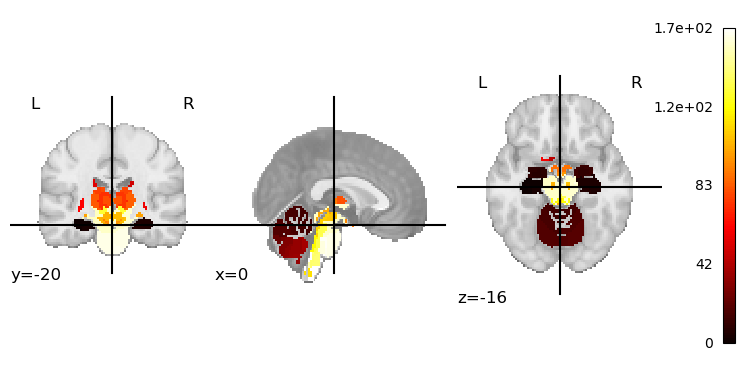

In [59]:
atlas_fname = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin6Asym_coarse_2mm_cifti_vols.nii.gz'

atlas_img = load_img(atlas_fname)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)
plotting.plot_stat_map(atlas_img)


In [ ]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
from neuromaps.datasets import fetch_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
# Define the colors at specific points
colors = [
    (-1.8, "#120041"),  # Start with blue at -1.9
    (-1.2, "#2500fa"),
    (-0.6, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (0.4, "#d50044"),
    (0.8, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (1.2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-1.8, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.9, to_rgba("#63a4ff", alpha=0.8)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (0.6, to_rgba("#ffa300", alpha=0.8)),   # 60% opacity
    (1.2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-1.9, 1.2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()



In [147]:
nib.load('./HCP_MMP1.lh.gii')

In [146]:
def read_gifti(gifti_fn):
    gii = nib.load(gifti_fn)
    data = np.vstack([da.data[np.newaxis, :]
                      for da in gii.darrays])
    return data

read_gifti('./HCP_MMP1.lh.gii')

gii_image = nib.gifti.GiftiImage(darrays=[label_array])
nib.save(gii_image, gifti_output_path)

array([[ 54.,  49.,  41., ..., 122., 122., 122.]], dtype=float32)

In [152]:
rh_names

[b'???',
 b'R_V1_ROI',
 b'R_MST_ROI',
 b'R_V6_ROI',
 b'R_V2_ROI',
 b'R_V3_ROI',
 b'R_V4_ROI',
 b'R_V8_ROI',
 b'R_4_ROI',
 b'R_3b_ROI',
 b'R_FEF_ROI',
 b'R_PEF_ROI',
 b'R_55b_ROI',
 b'R_V3A_ROI',
 b'R_RSC_ROI',
 b'R_POS2_ROI',
 b'R_V7_ROI',
 b'R_IPS1_ROI',
 b'R_FFC_ROI',
 b'R_V3B_ROI',
 b'R_LO1_ROI',
 b'R_LO2_ROI',
 b'R_PIT_ROI',
 b'R_MT_ROI',
 b'R_A1_ROI',
 b'R_PSL_ROI',
 b'R_SFL_ROI',
 b'R_PCV_ROI',
 b'R_STV_ROI',
 b'R_7Pm_ROI',
 b'R_7m_ROI',
 b'R_POS1_ROI',
 b'R_23d_ROI',
 b'R_v23ab_ROI',
 b'R_d23ab_ROI',
 b'R_31pv_ROI',
 b'R_5m_ROI',
 b'R_5mv_ROI',
 b'R_23c_ROI',
 b'R_5L_ROI',
 b'R_24dd_ROI',
 b'R_24dv_ROI',
 b'R_7AL_ROI',
 b'R_SCEF_ROI',
 b'R_6ma_ROI',
 b'R_7Am_ROI',
 b'R_7PL_ROI',
 b'R_7PC_ROI',
 b'R_LIPv_ROI',
 b'R_VIP_ROI',
 b'R_MIP_ROI',
 b'R_1_ROI',
 b'R_2_ROI',
 b'R_3a_ROI',
 b'R_6d_ROI',
 b'R_6mp_ROI',
 b'R_6v_ROI',
 b'R_p24pr_ROI',
 b'R_33pr_ROI',
 b'R_a24pr_ROI',
 b'R_p32pr_ROI',
 b'R_a24_ROI',
 b'R_d32_ROI',
 b'R_8BM_ROI',
 b'R_p32_ROI',
 b'R_10r_ROI',
 b'R_47m_ROI',
 b'R

In [159]:
lh_names = lh_names[1:-1]
rh_names = rh_names[1:-1]


In [161]:
lh_names

[b'L_V1_ROI',
 b'L_MST_ROI',
 b'L_V6_ROI',
 b'L_V2_ROI',
 b'L_V3_ROI',
 b'L_V4_ROI',
 b'L_V8_ROI',
 b'L_4_ROI',
 b'L_3b_ROI',
 b'L_FEF_ROI',
 b'L_PEF_ROI',
 b'L_55b_ROI',
 b'L_V3A_ROI',
 b'L_RSC_ROI',
 b'L_POS2_ROI',
 b'L_V7_ROI',
 b'L_IPS1_ROI',
 b'L_FFC_ROI',
 b'L_V3B_ROI',
 b'L_LO1_ROI',
 b'L_LO2_ROI',
 b'L_PIT_ROI',
 b'L_MT_ROI',
 b'L_A1_ROI',
 b'L_PSL_ROI',
 b'L_SFL_ROI',
 b'L_PCV_ROI',
 b'L_STV_ROI',
 b'L_7Pm_ROI',
 b'L_7m_ROI',
 b'L_POS1_ROI',
 b'L_23d_ROI',
 b'L_v23ab_ROI',
 b'L_d23ab_ROI',
 b'L_31pv_ROI',
 b'L_5m_ROI',
 b'L_5mv_ROI',
 b'L_23c_ROI',
 b'L_5L_ROI',
 b'L_24dd_ROI',
 b'L_24dv_ROI',
 b'L_7AL_ROI',
 b'L_SCEF_ROI',
 b'L_6ma_ROI',
 b'L_7Am_ROI',
 b'L_7PL_ROI',
 b'L_7PC_ROI',
 b'L_LIPv_ROI',
 b'L_VIP_ROI',
 b'L_MIP_ROI',
 b'L_1_ROI',
 b'L_2_ROI',
 b'L_3a_ROI',
 b'L_6d_ROI',
 b'L_6mp_ROI',
 b'L_6v_ROI',
 b'L_p24pr_ROI',
 b'L_33pr_ROI',
 b'L_a24pr_ROI',
 b'L_p32pr_ROI',
 b'L_a24_ROI',
 b'L_d32_ROI',
 b'L_8BM_ROI',
 b'L_p32_ROI',
 b'L_10r_ROI',
 b'L_47m_ROI',
 b'L_8Av_ROI'

In [164]:
lh_names

[b'L_V1_ROI',
 b'L_MST_ROI',
 b'L_V6_ROI',
 b'L_V2_ROI',
 b'L_V3_ROI',
 b'L_V4_ROI',
 b'L_V8_ROI',
 b'L_4_ROI',
 b'L_3b_ROI',
 b'L_FEF_ROI',
 b'L_PEF_ROI',
 b'L_55b_ROI',
 b'L_V3A_ROI',
 b'L_RSC_ROI',
 b'L_POS2_ROI',
 b'L_V7_ROI',
 b'L_IPS1_ROI',
 b'L_FFC_ROI',
 b'L_V3B_ROI',
 b'L_LO1_ROI',
 b'L_LO2_ROI',
 b'L_PIT_ROI',
 b'L_MT_ROI',
 b'L_A1_ROI',
 b'L_PSL_ROI',
 b'L_SFL_ROI',
 b'L_PCV_ROI',
 b'L_STV_ROI',
 b'L_7Pm_ROI',
 b'L_7m_ROI',
 b'L_POS1_ROI',
 b'L_23d_ROI',
 b'L_v23ab_ROI',
 b'L_d23ab_ROI',
 b'L_31pv_ROI',
 b'L_5m_ROI',
 b'L_5mv_ROI',
 b'L_23c_ROI',
 b'L_5L_ROI',
 b'L_24dd_ROI',
 b'L_24dv_ROI',
 b'L_7AL_ROI',
 b'L_SCEF_ROI',
 b'L_6ma_ROI',
 b'L_7Am_ROI',
 b'L_7PL_ROI',
 b'L_7PC_ROI',
 b'L_LIPv_ROI',
 b'L_VIP_ROI',
 b'L_MIP_ROI',
 b'L_1_ROI',
 b'L_2_ROI',
 b'L_3a_ROI',
 b'L_6d_ROI',
 b'L_6mp_ROI',
 b'L_6v_ROI',
 b'L_p24pr_ROI',
 b'L_33pr_ROI',
 b'L_a24pr_ROI',
 b'L_p32pr_ROI',
 b'L_a24_ROI',
 b'L_d32_ROI',
 b'L_8BM_ROI',
 b'L_p32_ROI',
 b'L_10r_ROI',
 b'L_47m_ROI',
 b'L_8Av_ROI'

In [162]:
rh_name_df = pd.DataFrame(rh_names)
rh_name_df.to_csv('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/rh.HCP_MMP1.ROI.txt')
lh_name_df = pd.DataFrame(lh_names)
lh_name_df.to_csv('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/lh.HCP_MMP1.ROI.txt')

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_93794/1887640510.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


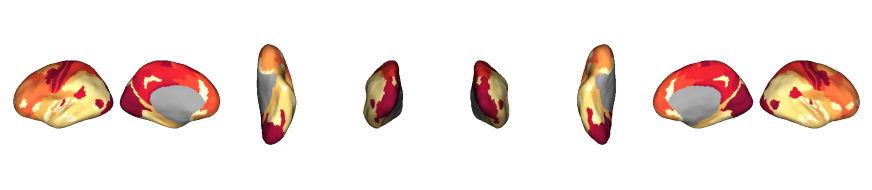

In [158]:
from neuromaps.datasets import fetch_fslr
import numpy as np
from neuromaps.datasets import fetch_fsaverage, fetch_fslr
from neuromaps.transforms import fsaverage_to_fslr
import nibabel as nib
surfaces = fetch_fsaverage()
lh, rh = surfaces['inflated']

# fsaverage = datasets.fetch_surf_fsaverage(mesh = 'fsaverage6')
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/rh.HCP_MMP1.fsaverage6.annot')
lh_roi_map = np.full(lh_labels.shape, lh_labels, dtype=np.float32)
rh_roi_map = np.full(rh_labels.shape, rh_labels, dtype=np.float32)
lh_roi_map[lh_roi_map == 0] = np.nan
rh_roi_map[rh_roi_map == 0] = np.nan
def write_gifti(data, output_fn):
    img = nib.gifti.GiftiImage(darrays=[nib.gifti.GiftiDataArray(data.astype('float32'))])
    nib.save(img, output_fn)

write_gifti(lh_roi_map, './HCP_MMP1.lh.gii') 
write_gifti(rh_roi_map, './HCP_MMP1.rh.gii') 

p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral', 'posterior'], mirror_views=True)
# fig = p.build()

# plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap='YlOrRd_r', cbar=False)
fig = p.build()
fig.show()


# sandbox

In [32]:
singletrial_parc

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
        111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
        122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
        133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 

In [57]:
atlas_fslr[0].agg_data().shape

(32492,)

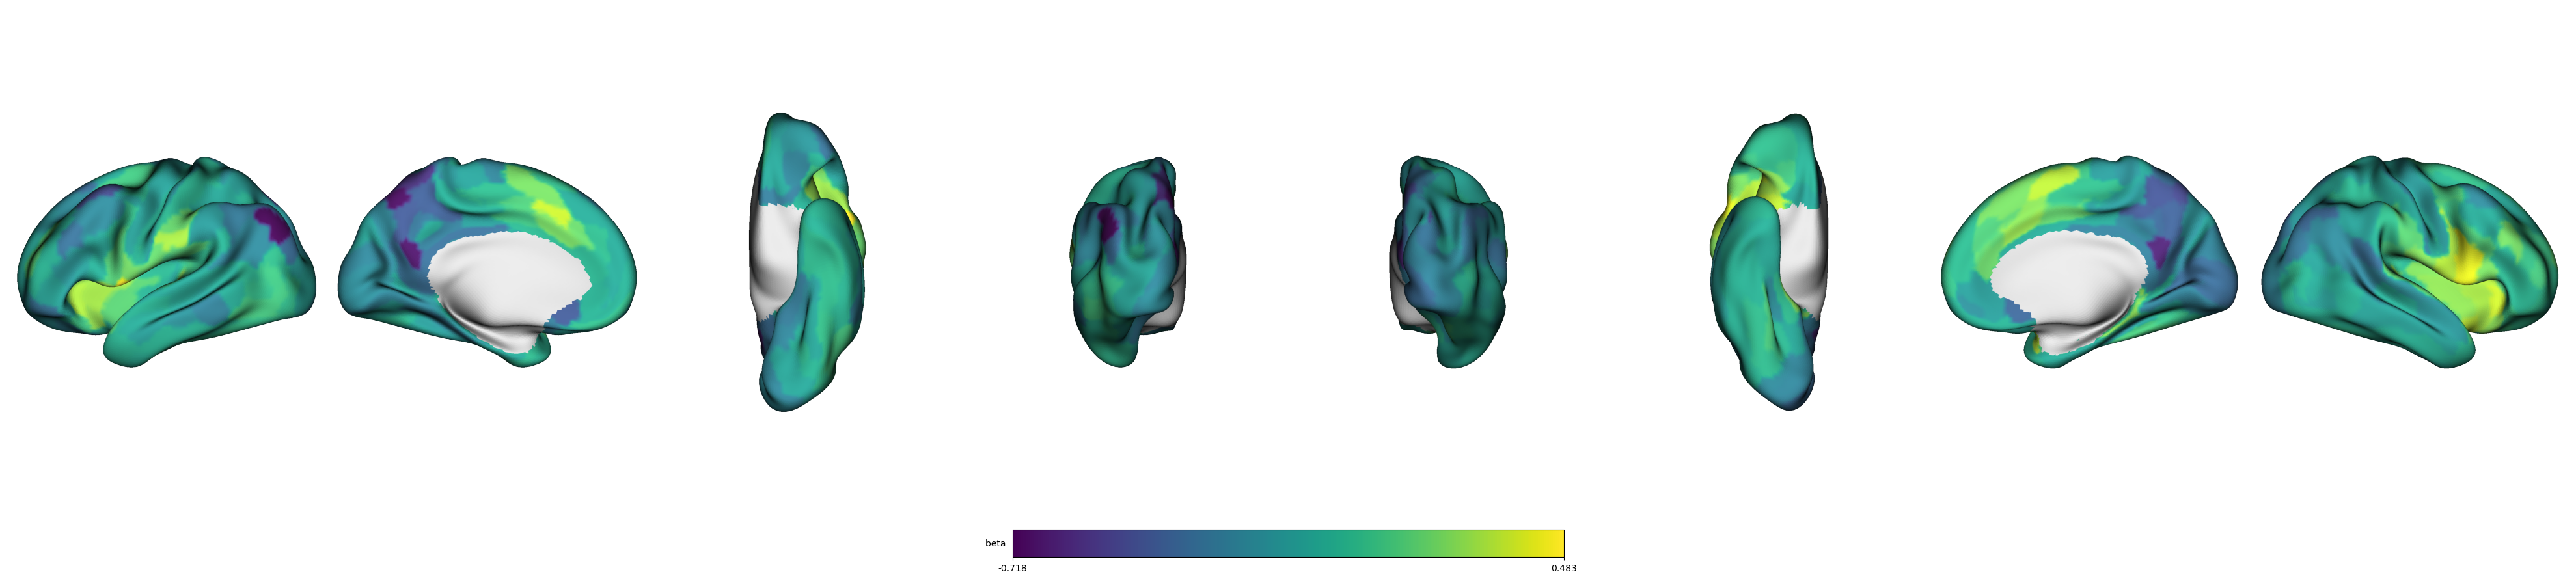

In [54]:
# convert to fslr
# beta_fslr = 
# import cmcrameri.cm as ccm
from neuromaps.transforms import mni152_to_fslr
atlas_ctx = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_coarse_2mm_cortex.nii.gz'
singletrial_fname = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0014/sub-0014_ses-03_run-01_runtype-pain_event-stimulus_trial-003_cuetype-high_stimintensity-low.nii.gz'
parc = parcellate.Parcellater(parcellation=atlas_ctx, 
                       space='MNI152', 
                       resampling_target='parcellation')
singletrial_parc = parc.fit_transform(singletrial_fname, 'MNI152')

atlas_inv = parc.inverse_transform(singletrial_parc)
atlas_fslr = mni152_to_fslr(
        atlas_inv, fslr_density='32k', method='linear')

# singletrial_parcfsLR = parcfsLR.fit_transform(beta_fslr, 'fsLR')
# print(f"check parcellated image: {singletrial_parcfsLR.shape}")
# betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)
fig = plot_brain_surfaces(image=atlas_fslr, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

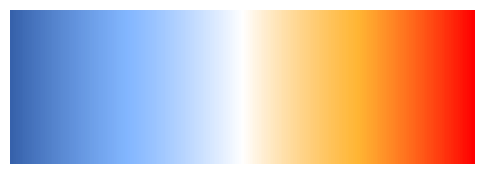

In [68]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
from neuromaps.datasets import fetch_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
# Define the colors at specific points
colors = [
    (-1.8, "#120041"),  # Start with blue at -1.9
    (-1.2, "#2500fa"),
    (-0.6, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (0.4, "#d50044"),
    (0.8, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (1.2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-1.8, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.9, to_rgba("#63a4ff", alpha=0.8)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (0.6, to_rgba("#ffa300", alpha=0.8)),   # 60% opacity
    (1.2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-1.9, 1.2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()



In [39]:
singletrialfsLR

(<nibabel.gifti.gifti.GiftiImage at 0x294d5fe10>,
 <nibabel.gifti.gifti.GiftiImage at 0x294d5fdd0>)

check parcellated image: (26666,)


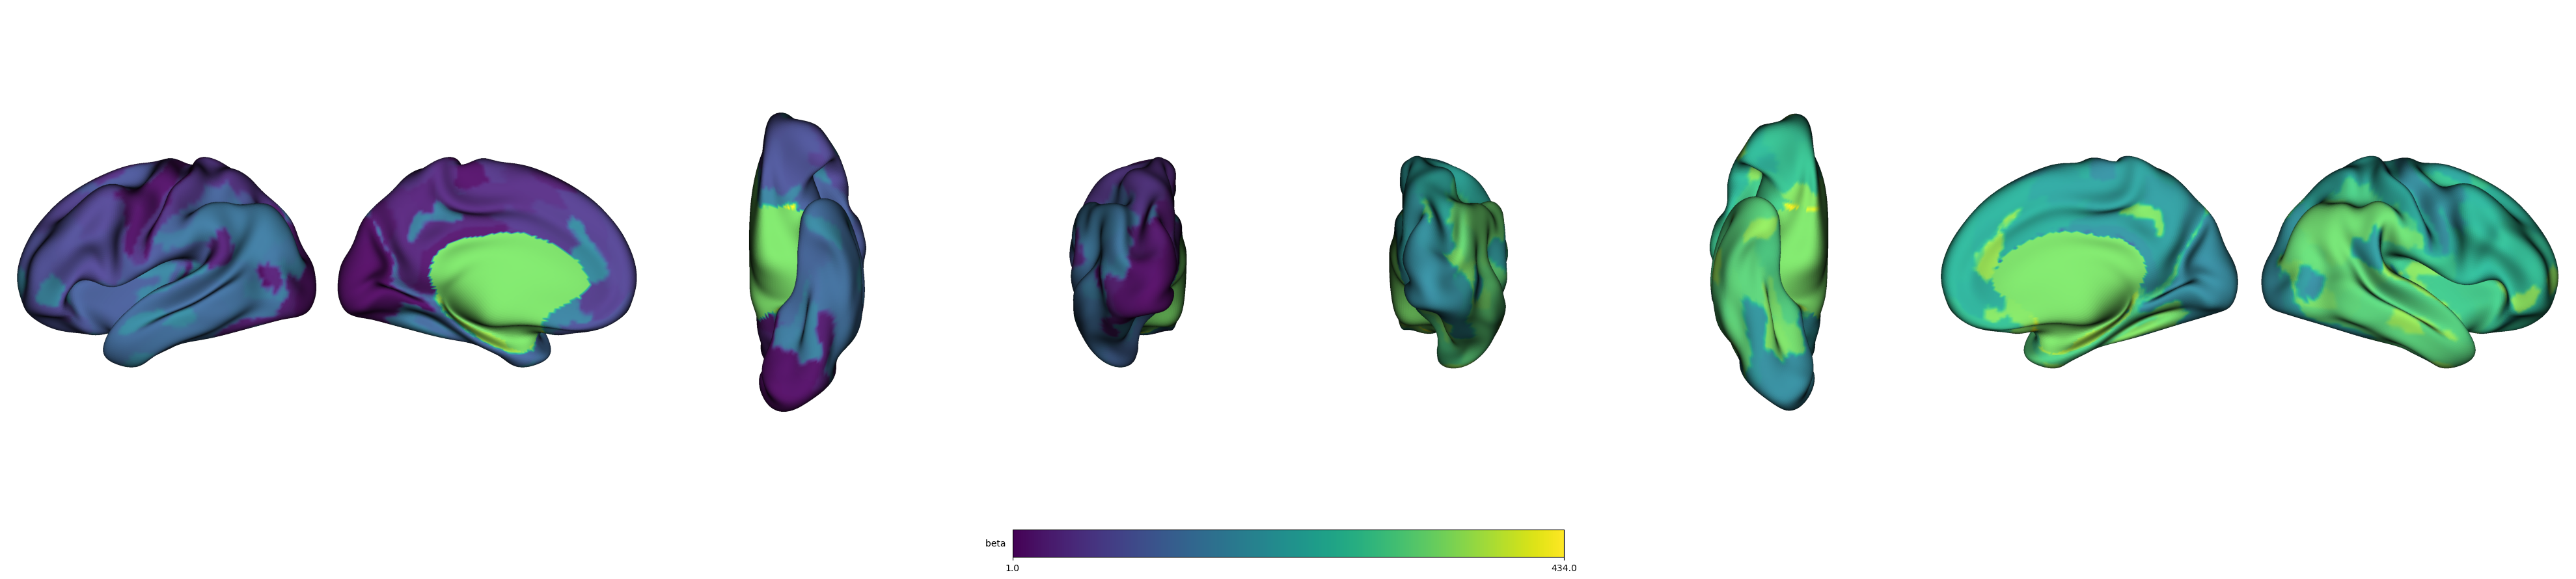

In [74]:
from neuromaps import parcellate
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_annotation, fetch_fslr
canlab2023fsLR = mni152_to_fslr(
        fname, fslr_density='32k', method='linear')
singletrialfsLR = mni152_to_fslr(
        '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', fslr_density='32k', method='linear')
parcfsLR = parcellate.Parcellater(parcellation=canlab2023fsLR, 
                       space='fsLR', 
                       resampling_target='parcellation')

singletrial_parcfsLR = parcfsLR.fit_transform(singletrialfsLR, 'fsLR')
print(f"check parcellated image: {singletrial_parcfsLR.shape}")
betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)

fig = plot_brain_surfaces(image=canlab2023fsLR, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

In [53]:
len(np.unique(canlab2023fsLR[0].agg_data()))

191

In [55]:
singletrialfsLR[0].agg_data()

array([ 1.1518242 ,  1.2154433 ,  2.3076987 , ..., -0.6537053 ,
       -0.34157434, -0.07537952], dtype=float32)

In [73]:
from neuromaps import parcellate
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_annotation, fetch_fslr
canlab2023fsLR = mni152_to_fslr(
        fname, fslr_density='32k', method='nearest')
singletrialfsLR = mni152_to_fslr(
        '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', fslr_density='32k', method='nearest')


In [ ]:
parcfsLR = parcellate.Parcellater(parcellation=canlab2023fsLR, 
                       space='fsLR', 
                       resampling_target='parcellation')

singletrial_parcfsLR = parcfsLR.fit_transform(singletrialfsLR, 'fsLR')
print(f"check parcellated image: {singletrial_parcfsLR.shape}")
betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)

fig = plot_brain_surfaces(image=canlab2023fsLR, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()